In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
import yfinance as yf
dat = yf.Ticker("MSFT")

In [5]:
start='2015-01-01'
end='2025-07-21'
stock='GOOG'
data = yf.download(stock,start,end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)

In [8]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2015-01-02,26.014023,26.334236,25.978830,26.222210,28951268
1,2015-01-05,25.471745,25.990231,25.431595,25.937192,41196796
2,2015-01-06,24.881384,25.586001,24.836278,25.527757,57998800
3,2015-01-07,24.838755,25.143303,24.766880,25.131208,41301082
4,2015-01-08,24.917070,24.956725,24.338111,24.684594,67071641
...,...,...,...,...,...,...
2646,2025-07-14,182.809998,184.729996,180.710999,182.070007,20990400
2647,2025-07-15,183.100006,185.410004,182.389999,183.940002,23911600
2648,2025-07-16,183.770004,185.335007,183.080002,184.320007,21152600


In [9]:
ma_100_days = data.Close.rolling(100).mean()

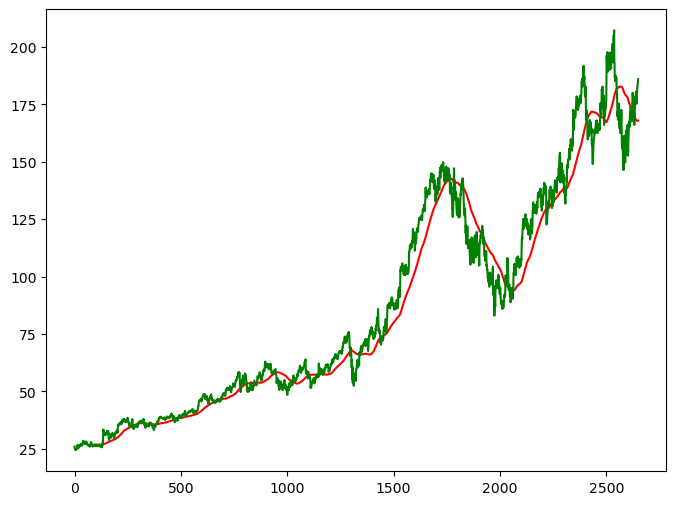

In [10]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [11]:
ma_200_days = data.Close.rolling(200).mean()

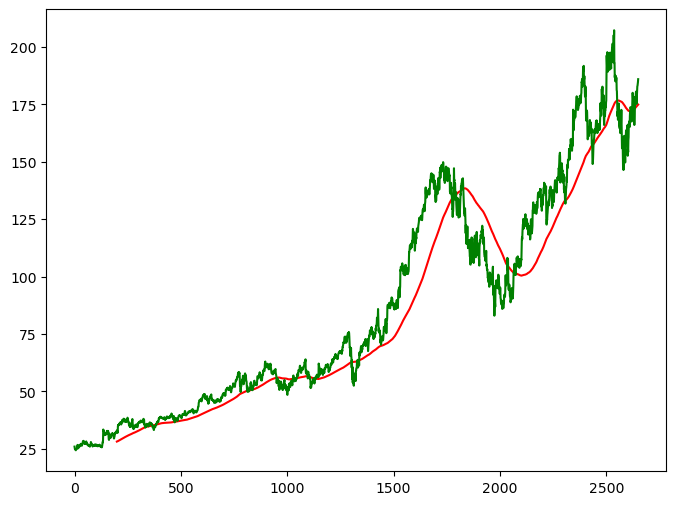

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_200_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [13]:
data.dropna(inplace=True)

In [16]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [17]:
data_train.shape[0]

2120

In [18]:
data_test.shape[0]

531

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [20]:
data_train_scale = scaler.fit_transform(data_train)

In [22]:
data_train_scale.shape[0]

2120

In [23]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [26]:
x, y = np.array(x), np.array(y)

In [27]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

In [31]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [33]:
model.fit(x,y,epochs=50,batch_size=32,verbose=1)

Epoch 1/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 24s 179ms/step - loss: 0.0861
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 175ms/step - loss: 0.0089
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 173ms/step - loss: 0.0076
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - loss: 0.0075
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.0088
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - loss: 0.0065
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - loss: 0.0060
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - loss: 0.0081
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 179ms/step - loss: 0.0068
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - loss: 0.0052
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - loss: 0.0046
Epoch 12/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 182ms/step - loss: 0.0051
Epoch 13/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 188ms/step - loss: 0.0044
Epoch 14/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 187ms/step - loss: 0.0045
Epoch 15/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [36]:
pas_100_days = data_train.tail(100)

In [37]:
data_test = pd.concat([pas_100_days,data_test],ignore_index=True)

In [38]:
data_test_scale = scaler.fit_transform(data_test)

In [41]:
x = []
y = []
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x),np.array(y)

In [42]:
y_predict = model.predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step


In [44]:
scale = 1/scaler.scale_

In [45]:
y_predict = y_predict*scale

In [46]:
y = y*scale

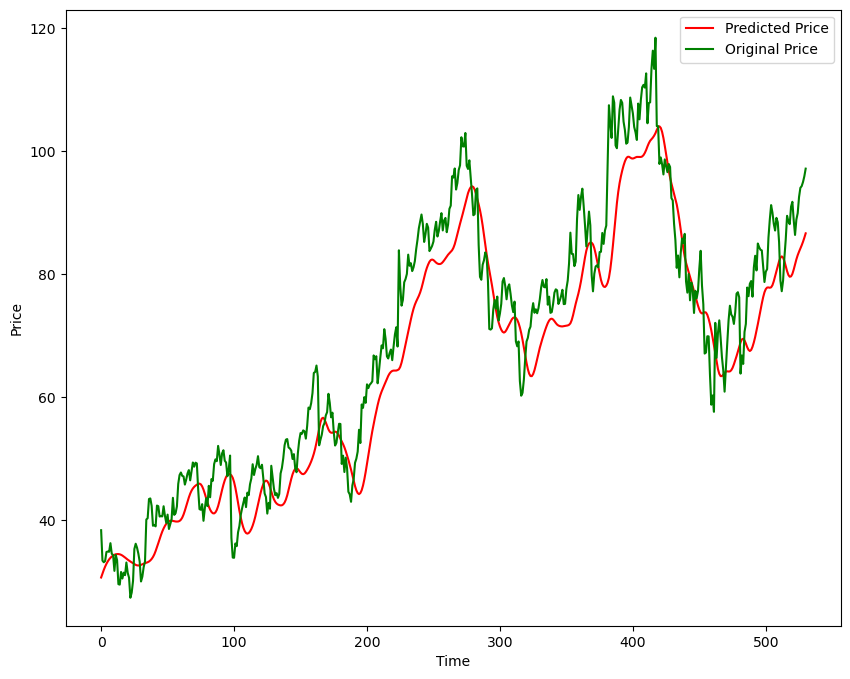

In [47]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [48]:
model.save('Stock Prediction Model.keras')